In [1]:
from clusc import *

In [2]:
circos_chrom = dict(
    file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    cytobands_file='/home/archer/Desktop/ClusC/examples/chromosome.band.hg19.txt',
    label=True,
    tick_unit=500000,
    tick_label='M',
    tick_length=0.1,
    radius=0.85,
    width=0.4,
    color=['red','orange','green','blue'],
    type='chrom')

circos_clusters_bed  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters.bed',
    radius=0.6,
    width=0.4,
    color=['red','orange','green','blue'],
    type='highlight')

circos_clusters_signal  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters_1.bed',
    radius=0.5,
    width=0.3,
    #color=['red','orange','green','blue'],
    type='bar')

circos_clusters_links  = dict(
    file='/home/archer/Desktop/ClusC/examples/results/clusters.links',
    radius=0.4,
    type='link')

circos_configs = {}
circos_configs[0] = circos_chrom
circos_configs[1] = circos_clusters_bed
circos_configs[2] = circos_clusters_signal

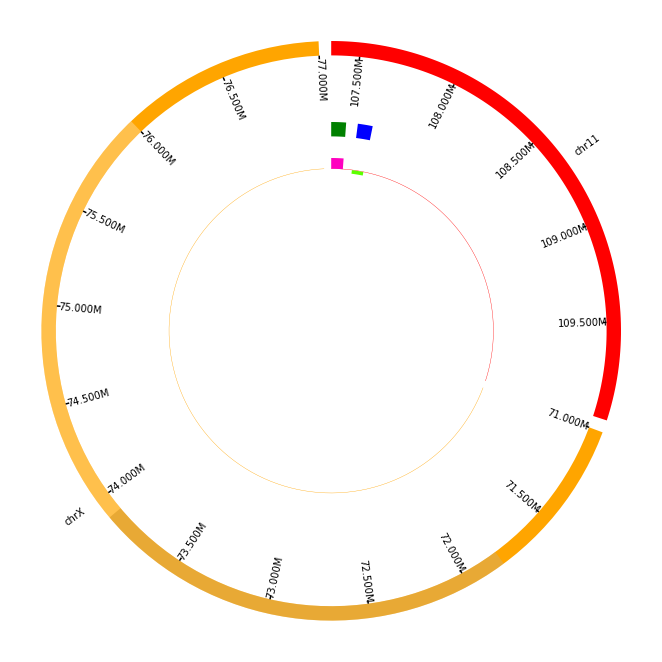

In [3]:
plotting_circos(circos_configs, '/home/archer/Desktop/ClusC/examples/results/plotting_circos.png')

In [4]:
tmp_pd = pd.read_csv('/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt', sep="\t", names=['chrom','start','end'])

In [7]:
tmp_pd

,chrom,start,end
0,chr11,107356000,109980000
1,chrX,71000000,77000000


In [12]:
unit = 500000
for index, row in tmp_pd.iterrows():
    get_ticks(chrom_pd, len_per_theta, unit, unit_label)
    

[107500000 108000000 108500000 109000000 109500000]
[71000000 71500000 72000000 72500000 73000000 73500000 74000000 74500000
 75000000 75500000 76000000 76500000 77000000]


In [32]:
abs(tmp_pd['score']).max()

4

In [15]:
np.tile(1, a.shape)

array([1, 1, 1, 1, 1])

In [19]:
np.zeros(np.shape(a))

array([0., 0., 0., 0., 0.])

In [20]:
np.zeros(a.shape)

array([0., 0., 0., 0., 0.])

In [13]:
cumlen = [0] + list(chrom_regions['length'].cumsum())[:-1]
cumlen

[0, 2484000]

In [10]:
chrom_regions[2]-chrom_regions[1]

0      2484000
1    155270560
dtype: int64

In [28]:
c = 'red'

In [31]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=5)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='gist_rainbow')

In [35]:
scalarMap.to_rgba(0)

(1.0, 0.0, 0.16, 1.0)

In [15]:
fig.show()

/home/archer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
